In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
infection = "Resources/infections_totals.csv"
death = "Resources/deaths_totals.csv"
cia = "Resources/cia_simplified.csv"
infectiond = pd.read_csv(infection)
deathd = pd.read_csv(death)
ciad = pd.read_csv(cia)
infectiondf = pd.DataFrame(infectiond)
deathdf = pd.DataFrame(deathd)
ciadf = pd.DataFrame(ciad)
infectiondf.head()

,country,total_infections
0,Austria,5466250
1,Italy,23642011
2,Portugal,5525459
3,Greece,5188890
4,Taiwan,7887537


In [5]:
df = pd.merge(infectiondf, ciadf, on="country")
df.head()

,country,total_infections,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave
0,Austria,5466250,0.104,5.29,7.3,83871,54333,445,8913088,483
1,Italy,23642011,0.087,3.95,3.1,301340,41267,2003,61095551,2470
2,Portugal,5525459,0.095,5.48,3.5,92090,33700,238,10242081,347
3,Greece,5188890,0.078,6.31,4.2,131957,28733,210,10533871,308
4,Indonesia,6521292,0.029,0.62,1.0,1904569,11533,1120,277329163,3175


In [8]:
df2 = pd.merge(df, deathdf, on="country")
df2.head()

,country,total_infections,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave,total_deaths
0,Austria,5466250,0.104,5.29,7.3,83871,54333,445,8913088,483,21037
1,Italy,23642011,0.087,3.95,3.1,301340,41267,2003,61095551,2470,179436
2,Portugal,5525459,0.095,5.48,3.5,92090,33700,238,10242081,347,25290
3,Greece,5188890,0.078,6.31,4.2,131957,28733,210,10533871,308,33750
4,Indonesia,6521292,0.029,0.62,1.0,1904569,11533,1120,277329163,3175,158829


In [14]:
(df.total_infections / 1000)
print(df)

     country  total_infections  current_health_expenditure_2019  \
0    Austria           5466250                            0.104   
1      Italy          23642011                            0.087   
2   Portugal           5525459                            0.095   
3     Greece           5188890                            0.078   
4  Indonesia           6521292                            0.029   
5      India          44660579                            0.030   
6     Mexico           7113658                            0.054   
7   Thailand           4695203                            0.038   
8       Iran           7558142                            0.067   

   physicians_density_per_1000_2020_to_2018  \
0                                      5.29   
1                                      3.95   
2                                      5.48   
3                                      6.31   
4                                      0.62   
5                                      0.74   


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (8).

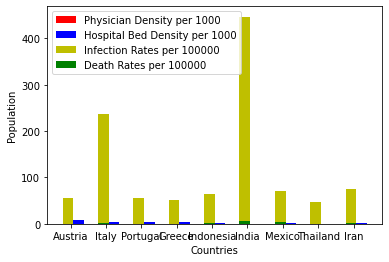

In [25]:
x = df2.country
y1 = df2.physicians_density_per_1000_2020_to_2018
y2 = df2.Hospital_bed_density_per_1000_2018_to_2017
y3 = (df.total_infections / 100000)
y4 = (df2.total_deaths / 100000)
N = 9
ind = np.arange(N)
width = 0.3 
plt.bar(ind, y1, width, color='r')
plt.bar(ind + width, y2, width, color='b')
plt.bar(x, y3, width, color='y')
plt.bar(x, y4, width, color='g')
plt.xlabel("Countries")
plt.ylabel("Population")
plt.legend(["Physician Density per 1000", "Hospital Bed Density per 1000", "Infection Rates per 100000", "Death Rates per 100000"])
plt.title("")
plt.xticks(ind + width / 4, ('Xtick1', 'Xtick3', 'Xtick3', 'Xtick3', 'Xtick3', 'Xtick3', 'Xtick3', 'Xtick3'))
plt.show()

In [ ]:
sns.factorplot(x = 'country', y='physicians_density_per_1000_2020_to_2018', 
               hue = 'investments',data=df, kind='bar')